# TMDB Movie Data Analysis

## Project Overview
This project challenges us to build a movie data analysis pipeline using Python and Pandas. We will fetch movie-related data from the TMDB API, clean and transform the dataset, and implement key performance indicators (KPIs) to identify the best and worst movies based on financial and popularity metrics.

## Objectives
1. **API Data Extraction**: Fetch movie data from the TMDB API.
2. **Data Cleaning & Transformation**: Process and structure the data for analysis.
3. **Exploratory Data Analysis (EDA)**: Perform an initial exploration to understand trends.
4. **Advanced Filtering & Ranking**: Identify the best and worst movies based on financial and popularity metrics.
5. **Franchise & Director Analysis**: Assess how franchises and directors perform over time.
6. **Visualization & Insights**: Present key findings using visualizations.


## Setup and Imports
First, we import the necessary libraries and set up our environment.


In [1]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Load environment variables from .env file (e.g., API keys)
load_dotenv()

# Retrieve the API key securely
API_KEY = os.getenv('TMDB_API_KEY')
BASE_URL = "https://api.themoviedb.org/3"

# Verify that the API key is present
if not API_KEY:
    print("WARNING: TMDB_API_KEY not found in environment variables.")
else:
    print("API Key loaded successfully.")

API Key loaded successfully.


## Step 1: Fetch Movie Data from API
We need to fetch data for a specific list of movies provided in the assignment. We will define functions to fetch details for each movie ID, including credits (cast and crew).


In [2]:
def fetch_movie_details(movie_id):
    """
    Fetches details for a specific movie ID, including credits.
    """
    # Ensure we have an API key before making requests
    if not API_KEY:
        raise ValueError("TMDB_API_KEY not found.")
        
    # Construct the API URL, requesting 'credits' (cast/crew) in the same call
    url = f"{BASE_URL}/movie/{movie_id}?api_key={API_KEY}&language=en-US&append_to_response=credits"
    try:
        # Make the HTTP GET request
        response = requests.get(url)
        # Check for HTTP errors (like 404 Not Found)
        response.raise_for_status()
        # Return the parsed JSON data
        return response.json()
    except Exception as e:
        # Log any errors that occur during the fetch
        print(f"Error fetching movie {movie_id}: {e}")
        return None

In [3]:
def fetch_specific_movies(movie_ids):
    """
    Fetches data for a list of movie IDs.
    """
    movies = []
    for i, movie_id in enumerate(movie_ids):
        data = fetch_movie_details(movie_id)
        if data:
            movies.append(data)
    return movies


In [4]:
# List of movie ids to fetch
movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513]

raw_movies_data = fetch_specific_movies(movie_ids)

Error fetching movie 0: 404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/0?api_key=ec1db5cde209ace2122b5f7bd9c3f18c&language=en-US&append_to_response=credits


In [5]:
# storing data in a DataFrame
df = pd.DataFrame(raw_movies_data)

In [7]:
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,...,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.237,26997,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,...,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.594,32907,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,[US],en,...,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.255,20117,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,[US],en,...,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.235,31204,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,[US],en,...,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on earth could come between them.,Titanic,False,7.903,26531,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


## Step 2: Data Cleaning and Preprocessing
Now that we have the raw data, we need to clean it. This involves:
1.  Dropping irrelevant columns.
2.  Extracting data from JSON-like columns (genres, production companies, etc.).
3.  **Inspecting extracted columns** for anomalies.
4.  Handling missing or incorrect data (e.g., 0 budget).
5.  **Handling vote_count = 0**.
6.  Converting data types.
7.  Calculating new metrics like ROI and Profit.


In [123]:
# Helper function to extract names from JSON-like columns
def extract_names(x):
    """Extracts names from a list of dictionaries."""
    if isinstance(x, list):
        return "|".join([i['name'] for i in x if 'name' in i])
    return ""


In [124]:
# Create DataFrame and drop irrelevant columns
df = pd.DataFrame(raw_movies_data)

drop_cols = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

print(f"Initial DataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Initial DataFrame shape: (18, 22)
Columns: ['backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'id', 'origin_country', 'original_language', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'credits']


In [125]:
# Extract and clean JSON-like columns
# These columns contain lists of dictionaries (e.g., [{'id': 1, 'name': 'Action'}, ...])
json_cols = ['genres', 'belongs_to_collection', 'production_countries', 'production_companies', 'spoken_languages']

for col in json_cols:
    if col in df.columns:
        # Special case: 'belongs_to_collection' is a single dictionary, not a list
        if col == 'belongs_to_collection':
            df[col] = df[col].apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else "")
        else:
            # General case: Apply the extract_names helper to get a pipe-separated string of names
            df[col] = df[col].apply(extract_names)

In [126]:
# Inspect extracted columns using value_counts() to identify anomalies
for col in json_cols:
    if col in df.columns:
        print(df[col].value_counts().head(5))

genres
Adventure|Action|Science Fiction             3
Action|Adventure|Science Fiction|Thriller    2
Action|Adventure|Science Fiction             2
Action|Adventure|Fantasy|Science Fiction     1
Drama|Romance                                1
Name: count, dtype: int64
belongs_to_collection
The Avengers Collection     4
Star Wars Collection        2
                            2
Frozen Collection           2
Jurassic Park Collection    2
Name: count, dtype: int64
production_countries
United States of America                   16
United States of America|United Kingdom     1
United Kingdom|United States of America     1
Name: count, dtype: int64
production_companies
Marvel Studios                                                                          5
Walt Disney Animation Studios                                                           2
Dune Entertainment|Lightstorm Entertainment|20th Century Fox|Ingenious Film Partners    1
Paramount Pictures|20th Century Fox|Lightstorm Entertainme

In [127]:
# Convert column datatypes
numeric_cols = ['budget', 'id', 'popularity', 'revenue', 'vote_average', 'vote_count', 'runtime']
for col in numeric_cols:
    df[col] = pd.to_numeric(df.get(col, 0), errors='coerce')

In [128]:
# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

In [129]:
# checking the datatypes after conversion
print(df[numeric_cols + ['release_date', 'release_year']].dtypes)

budget                   int64
id                       int64
popularity             float64
revenue                  int64
vote_average           float64
vote_count               int64
runtime                  int64
release_date    datetime64[ns]
release_year             int32
dtype: object


In [130]:
# Handling unrealistic values and create derived columns

# Replace 0 with NaN (Not a Number) for budget, revenue, and runtime
# This prevents 0s from skewing averages or calculations
for col in ['budget', 'revenue', 'runtime']:
    df[col] = df[col].replace(0, pd.NA)

# Convert budget and revenue to million USD for better readability
df['budget_musd'] = df['budget'] / 1000000
df['revenue_musd'] = df['revenue'] / 1000000

# Handle cases where vote_count is 0 (avoid misleading averages)
if 'vote_count' in df.columns and 'vote_average' in df.columns:
    df.loc[df['vote_count'] == 0, 'vote_average'] = 0

# Replace placeholders like 'No Data' or empty strings with NaN
for col in ['overview', 'tagline']:
    if col in df.columns:
        df[col] = df[col].replace(['No Data', ''], pd.NA)

In [131]:
# Budget and Revenue statistics (in MUSD)
print(df[['budget_musd', 'revenue_musd']].describe())

       budget_musd  revenue_musd
count    18.000000     18.000000
mean    213.777778   1691.831828
std      61.959717    521.062285
min     125.000000   1243.225667
25%     162.500000   1334.901927
50%     200.000000   1484.541738
75%     243.000000   1957.195640
max     356.000000   2923.706026


In [132]:
# Remove duplicates based on movie ID to ensure uniqueness
df = df.drop_duplicates(subset='id')

# Drop rows where critical identification info (ID or Title) is missing
df = df.dropna(subset=['id', 'title'])

# Keep only rows where at least 10 columns have valid (non-NaN) values
# This filters out empty or very sparse records
df = df.dropna(thresh=10)

# Filter to include only movies that have been released
if 'status' in df.columns:
    # Create a boolean mask for released movies
    is_released = df['status'] == 'Released'
    
    # Apply the mask to filter the DataFrame
    df = df[is_released]
    
    # Drop the status column as it's no longer needed for analysis
    df = df.drop(columns=['status'])

In [133]:
# DataFrame shape after filtering: 
df.shape

(18, 24)

In [134]:
# Helper functions for extracting credits information
def get_director(x):
    """Extracts director name from credits."""
    if isinstance(x, dict) and 'crew' in x:
        for crew in x['crew']:
            if crew.get('job') == 'Director':
                return crew.get('name')
    return ""

In [135]:
def get_cast(x):
    """Extracts top 5 cast members from credits."""
    if isinstance(x, dict) and 'cast' in x:
        return "|".join([c['name'] for c in x['cast'][:5]])
    return ""

In [136]:
df['credits'].head(1)

0    {'cast': [{'adult': False, 'gender': 2, 'id': ...
Name: credits, dtype: object

In [137]:
# Extract credits information (director, cast, sizes)
if 'credits' in df.columns:
    # Use helper functions to get the director's name and top cast members
    df['director'] = df['credits'].apply(get_director)
    df['cast'] = df['credits'].apply(get_cast)
    
    # Calculate the size of the cast and crew lists
    df['cast_size'] = df['credits'].apply(lambda x: len(x.get('cast', [])) if isinstance(x, dict) else 0)
    df['crew_size'] = df['credits'].apply(lambda x: len(x.get('crew', [])) if isinstance(x, dict) else 0)

In [138]:
# Sample of extracted credits
print(df[['title', 'director', 'cast']].head())

                          title       director  \
0             Avengers: Endgame  Anthony Russo   
1                        Avatar  James Cameron   
2  Star Wars: The Force Awakens    J.J. Abrams   
3        Avengers: Infinity War      Joe Russo   
4                       Titanic  James Cameron   

                                                cast  
0  Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...  
1  Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...  
2  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...  
3  Robert Downey Jr.|Chris Evans|Chris Hemsworth|...  
4  Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...  


In [139]:
# Reorder columns and select final columns
target_cols = [
    'id', 'title', 'tagline', 'release_date', 'release_year', 'genres', 'belongs_to_collection', 
    'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 
    'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 
    'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size'
]

# Select only existing columns from target list
final_cols = [c for c in target_cols if c in df.columns]
df_clean = df[final_cols].copy()

# Reset index
df_clean = df_clean.reset_index(drop=True)

In [140]:
# Final columns: 
list(df_clean.columns)

['id',
 'title',
 'tagline',
 'release_date',
 'release_year',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'director',
 'crew_size']

In [141]:
# Calculate ROI (Return on Investment) and Profit

# Fill NaN values with 0 to allow for calculation
df_clean['budget_musd'] = df_clean['budget_musd'].fillna(0)
df_clean['revenue_musd'] = df_clean['revenue_musd'].fillna(0)

# Calculate ROI: Revenue / Budget
# We check if budget > 0 to avoid DivisionByZero errors
df_clean['roi'] = df_clean.apply(
    lambda row: row['revenue_musd'] / row['budget_musd'] if row['budget_musd'] > 0 else 0, 
    axis=1
)

# Calculate Profit: Revenue - Budget
df_clean['profit'] = df_clean['revenue_musd'] - df_clean['budget_musd']

df_clean.shape

(18, 25)

In [142]:
# ROI and Profit calculated successfully

display(df_clean)

# len(df_clean) # the total movies

,id,title,tagline,release_date,release_year,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size,roi,profit
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,2019,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,...,181,After the devastating events of Avengers: Infi...,English|日本語|,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,607,7.863593,2443.439100
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,2009,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,...,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,990,12.336312,2686.706026
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,2015,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,...,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,262,8.441729,1823.223624
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,2018,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,...,149,As the Avengers and their allies have continue...,English|,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo,733,6.841383,1752.415039
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,1997,Drama|Romance,,en,200.0,2264.162353,...,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262,11.320812,2064.162353
5,135397,Jurassic World,The park is open.,2015-06-06,2015,Action|Adventure|Science Fiction|Thriller,Jurassic Park Collection,en,150.0,1671.537444,...,124,Twenty-two years after the events of Jurassic ...,English,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,53,Colin Trevorrow,426,11.143583,1521.537444
6,420818,The Lion King,The king has returned.,2019-07-12,2019,Adventure|Drama|Family|Animation,The Lion King (Reboot) Collection,en,260.0,1662.020819,...,118,"Simba idolizes his father, King Mufasa, and ta...",English,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,Chiwetel Ejiofor|John Oliver|Donald Glover|Jam...,20,Jon Favreau,48,6.392388,1402.020819
7,24428,The Avengers,Some assembly required.,2012-04-25,2012,Science Fiction|Action|Adventure,The Avengers Collection,en,220.0,1518.815515,...,143,When an unexpected enemy emerges and threatens...,English|हिन्दी|Pусский,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,113,Joss Whedon,641,6.903707,1298.815515
8,168259,Furious 7,Vengeance hits home.,2015-04-01,2015,Action|Crime|Thriller,The Fast and the Furious Collection,en,190.0,1515.400000,...,139,Deckard Shaw seeks revenge against Dominic Tor...,العربية|English|Español|ภาษาไทย,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,49,James Wan,227,7.975789,1325.400000
9,99861,Avengers: Age of Ultron,A new age has come.,2015-04-22,2015,Action|Adventure|Science Fiction,The Avengers Collection,en,235.0,1405.403694,...,141,When Tony Stark tries to jumpstart a dormant p...,English,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,74,Joss Whedon,652,5.980441,1170.403694


In [143]:
# Summary of cleaned data

# Missing values per column:")
print(df_clean.isnull().sum())

id                       0
title                    0
tagline                  0
release_date             0
release_year             0
genres                   0
belongs_to_collection    0
original_language        0
budget_musd              0
revenue_musd             0
production_companies     0
production_countries     0
vote_count               0
vote_average             0
popularity               0
runtime                  0
overview                 0
spoken_languages         0
poster_path              0
cast                     0
cast_size                0
director                 0
crew_size                0
roi                      0
profit                   0
dtype: int64


## Step 3: KPI Implementation & Analysis

### Finding the Best and Worst Movies

In [144]:
# highest revenue movies
highest_revenue = df_clean.sort_values('revenue_musd', ascending=False).head(5)
highest_revenue[['title', 'revenue_musd']]

,title,revenue_musd
1,Avatar,2923.706026
0,Avengers: Endgame,2799.439100
4,Titanic,2264.162353
2,Star Wars: The Force Awakens,2068.223624
3,Avengers: Infinity War,2052.415039


In [145]:
# highest budget movies
highest_budget = df_clean.sort_values('budget_musd', ascending=False).head(5)
highest_budget[['title', 'budget_musd']]

,title,budget_musd
0,Avengers: Endgame,356.0
3,Avengers: Infinity War,300.0
12,Star Wars: The Last Jedi,300.0
6,The Lion King,260.0
2,Star Wars: The Force Awakens,245.0


In [146]:
# highest profit movies
highest_profit = df_clean.sort_values('profit', ascending=False).head(5)
highest_profit[['title', 'profit']]

,title,profit
1,Avatar,2686.706026
0,Avengers: Endgame,2443.439100
4,Titanic,2064.162353
2,Star Wars: The Force Awakens,1823.223624
3,Avengers: Infinity War,1752.415039


In [147]:
# lowest profit movies
lowest_profit = df_clean.sort_values('profit', ascending=True).head(5)
lowest_profit[['title', 'profit']]

,title,profit
12,Star Wars: The Last Jedi,1032.698830
17,Incredibles 2,1043.225667
16,Beauty and the Beast,1106.115964
15,Frozen,1124.219009
14,Jurassic World: Fallen Kingdom,1140.469037


In [148]:
# highest ROI for movies with budget >= 10 million
high_budget_movies = df_clean[df_clean['budget_musd'] >= 10]
highest_roi = high_budget_movies.sort_values('roi', ascending=False).head(5)
highest_roi[['title', 'roi']]

,title,roi
1,Avatar,12.336312
4,Titanic,11.320812
5,Jurassic World,11.143583
11,Harry Potter and the Deathly Hallows: Part 2,10.732090
13,Frozen II,9.691223


In [149]:
# lowest ROI for movies with budget >= 10 million
lowest_roi = high_budget_movies.sort_values('roi', ascending=True).head(5)
lowest_roi[['title', 'roi']]

,title,roi
12,Star Wars: The Last Jedi,4.442329
9,Avengers: Age of Ultron,5.980441
17,Incredibles 2,6.216128
6,The Lion King,6.392388
10,Black Panther,6.749630


In [150]:
# most voted movies
most_voted = df_clean.sort_values('vote_count', ascending=False).head(5)
most_voted[['title', 'vote_count']]

,title,vote_count
7,The Avengers,34329
1,Avatar,32884
3,Avengers: Infinity War,31190
0,Avengers: Endgame,26978
4,Titanic,26519


In [151]:
# highest rated movies (at least 10 votes)
movies_with_votes = df_clean[df_clean['vote_count'] >= 10]
highest_rated = movies_with_votes.sort_values('vote_average', ascending=False).head(5)
highest_rated[['title', 'vote_average']]

,title,vote_average
0,Avengers: Endgame,8.237
3,Avengers: Infinity War,8.235
11,Harry Potter and the Deathly Hallows: Part 2,8.084
4,Titanic,7.903
7,The Avengers,7.870


In [152]:
# lowest rated movies (at least 10 votes)
lowest_rated = movies_with_votes.sort_values('vote_average', ascending=True).head(5)
lowest_rated[['title', 'vote_average']]

,title,vote_average
14,Jurassic World: Fallen Kingdom,6.537
5,Jurassic World,6.699
12,Star Wars: The Last Jedi,6.764
16,Beauty and the Beast,6.969
6,The Lion King,7.102


In [153]:
# most popular movies
most_popular = df_clean.sort_values('popularity', ascending=False).head(5)
most_popular[['title', 'popularity']]

,title,popularity
7,The Avengers,40.3021
1,Avatar,38.2316
4,Titanic,23.4289
3,Avengers: Infinity War,20.7267
15,Frozen,18.2770


### Creating a Reusable Function for Ranking

In [154]:
def rank_movies(df, metric, ascending=False, top_n=5, filter_col=None, filter_val=None):
    """
    Helper function to rank movies based on a specific metric.
    """
    data = df.copy()
    
    # Apply an optional filter (e.g., only movies with budget > 10M)
    if filter_col:
        data = data[data[filter_col] >= filter_val]
    
    # Sort by the metric and take the top N results
    ranked = data.sort_values(metric, ascending=ascending).head(top_n)
    
    # Return only the title and the metric column for display
    return ranked[['title', metric]]

In [155]:
# using the function to get highest revenue
rank_movies(df_clean, 'revenue_musd')

,title,revenue_musd
1,Avatar,2923.706026
0,Avengers: Endgame,2799.439100
4,Titanic,2264.162353
2,Star Wars: The Force Awakens,2068.223624
3,Avengers: Infinity War,2052.415039


In [156]:
# highest profit
rank_movies(df_clean, 'profit')

,title,profit
1,Avatar,2686.706026
0,Avengers: Endgame,2443.439100
4,Titanic,2064.162353
2,Star Wars: The Force Awakens,1823.223624
3,Avengers: Infinity War,1752.415039


In [157]:
# highest ROI with budget filter
rank_movies(df_clean, 'roi', filter_col='budget_musd', filter_val=10)

,title,roi
1,Avatar,12.336312
4,Titanic,11.320812
5,Jurassic World,11.143583
11,Harry Potter and the Deathly Hallows: Part 2,10.732090
13,Frozen II,9.691223


In [158]:
# highest rated with vote filter
rank_movies(df_clean, 'vote_average', filter_col='vote_count', filter_val=10)

,title,vote_average
0,Avengers: Endgame,8.237
3,Avengers: Infinity War,8.235
11,Harry Potter and the Deathly Hallows: Part 2,8.084
4,Titanic,7.903
7,The Avengers,7.870


In [159]:
# most popular
rank_movies(df_clean, 'popularity')

,title,popularity
7,The Avengers,40.3021
1,Avatar,38.2316
4,Titanic,23.4289
3,Avengers: Infinity War,20.7267
15,Frozen,18.2770


In [160]:
# Finding Sci-Fi Action movies featuring Bruce Willis

# Create boolean masks for each condition
mask_scifi = df_clean['genres'].str.contains('Science Fiction', na=False)
mask_action = df_clean['genres'].str.contains('Action', na=False)
mask_bruce = df_clean['cast'].str.contains('Bruce Willis', na=False)

# Combine masks using bitwise AND (&) to find movies matching ALL criteria
bruce_movies = df_clean[mask_scifi & mask_action & mask_bruce]

# Sort the results by rating
bruce_movies = bruce_movies.sort_values('vote_average', ascending=False)

# Display relevant columns
bruce_movies[['title', 'vote_average', 'release_date']]

,title,vote_average,release_date


In [161]:
# Uma Thurman and Quentin Tarantino movies
mask_uma = df_clean['cast'].str.contains('Uma Thurman', na=False)
mask_qt = df_clean['director'].str.contains('Quentin Tarantino', na=False)

uma_qt_movies = df_clean[mask_uma & mask_qt]
uma_qt_movies = uma_qt_movies.sort_values('runtime')
uma_qt_movies[['title', 'runtime', 'release_date']]

,title,runtime,release_date


In [162]:
# Franchise vs Standalone comparison

# Create a boolean column: True if belongs_to_collection has a value, else False
df_clean['is_franchise'] = df_clean['belongs_to_collection'].apply(lambda x: True if x else False)

# Group by the new column and calculate aggregate statistics
franchise_stats = df_clean.groupby('is_franchise').agg({
    'revenue_musd': 'mean',      # Average revenue
    'roi': 'median',             # Median ROI (less sensitive to outliers)
    'budget_musd': 'mean',       # Average budget
    'popularity': 'mean',        # Average popularity
    'vote_average': 'mean'       # Average rating
})

# Rename the index for better readability
franchise_stats = franchise_stats.rename(index={True: 'Franchise', False: 'Standalone'})
franchise_stats

,revenue_musd,roi,budget_musd,popularity,vote_average
is_franchise,,,,,
Standalone,1765.139159,9.617018,180.0,16.625400,7.436000
Franchise,1682.668411,7.786117,218.0,15.002512,7.383875


In [163]:
# most successful franchises
franchise_df = df_clean[df_clean['is_franchise']]

franchise_df = franchise_df.groupby('belongs_to_collection').agg({
    'title': 'count',
    'budget_musd': ['sum', 'mean'],
    'revenue_musd': ['sum', 'mean'],
    'vote_average': 'mean'
})

franchise_df.columns = ['movie_count', 'total_budget', 'mean_budget', 'total_revenue', 'mean_revenue', 'mean_rating']

franchise_df.sort_values('total_revenue', ascending=False).head(5)

,movie_count,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
belongs_to_collection,,,,,,
The Avengers Collection,4,1111.0,277.75,7776.073348,1944.018337,7.90325
Star Wars Collection,2,545.0,272.50,3400.922454,1700.461227,7.00950
Jurassic Park Collection,2,320.0,160.00,2982.006481,1491.003241,6.61800
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.59400
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.22500


In [164]:
# most successful directors
director_df = df_clean.groupby('director').agg({
    'title': 'count',
    'revenue_musd': 'sum',
    'vote_average': 'mean'
})

director_df.columns = ['movie_count', 'total_revenue', 'mean_rating']

# remove empty director names
if "" in director_df.index:
    director_df = director_df.drop("")

director_df.sort_values('total_revenue', ascending=False).head(5)

,movie_count,total_revenue,mean_rating
director,,,
James Cameron,2,5187.868379,7.7485
Joss Whedon,2,2924.219209,7.5705
Anthony Russo,1,2799.439100,8.2370
J.J. Abrams,1,2068.223624,7.2550
Joe Russo,1,2052.415039,8.2350


## Step 4: Data Visualization

In [165]:
sns.set_theme(style="whitegrid")

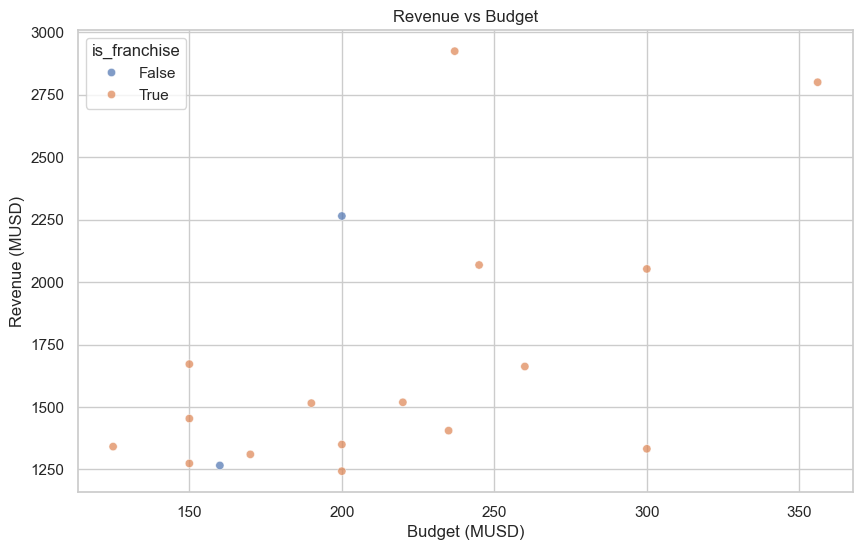

In [166]:
# Revenue vs Budget scatter plot
plt.figure(figsize=(10, 6))

# Create a scatter plot
# hue='is_franchise' colors the points differently for franchise vs standalone movies
sns.scatterplot(data=df_clean, x='budget_musd', y='revenue_musd', hue='is_franchise', alpha=0.7)

plt.title('Revenue vs Budget')
plt.xlabel('Budget (MUSD)')
plt.ylabel('Revenue (MUSD)')
plt.show()

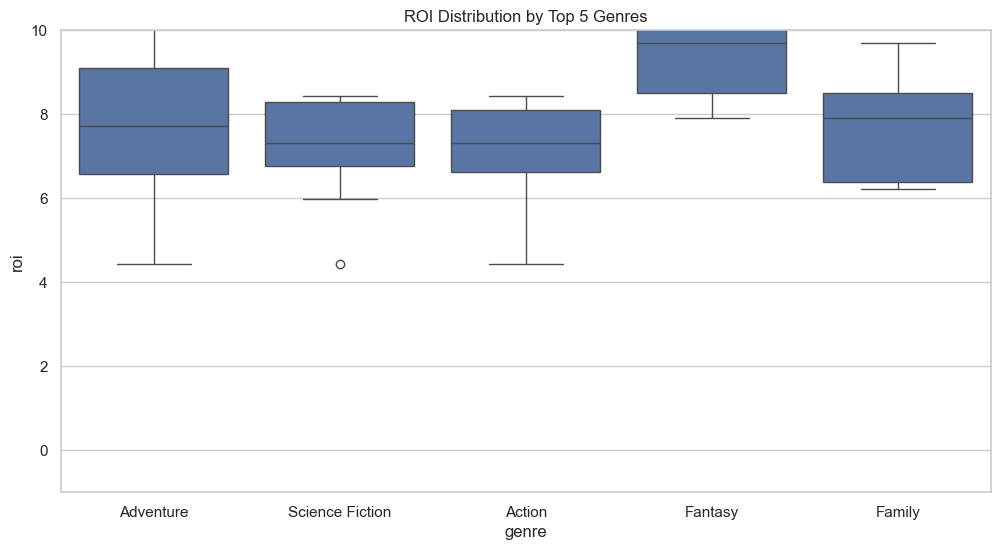

In [167]:
# ROI by genre boxplot
df_genres = df_clean.assign(genre=df_clean['genres'].str.split('|')).explode('genre')
top_genres = df_genres['genre'].value_counts().head(5).index
df_top_genres = df_genres[df_genres['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_genres, x='genre', y='roi')
plt.title('ROI Distribution by Top 5 Genres')
plt.ylim(-1, 10)
plt.show()

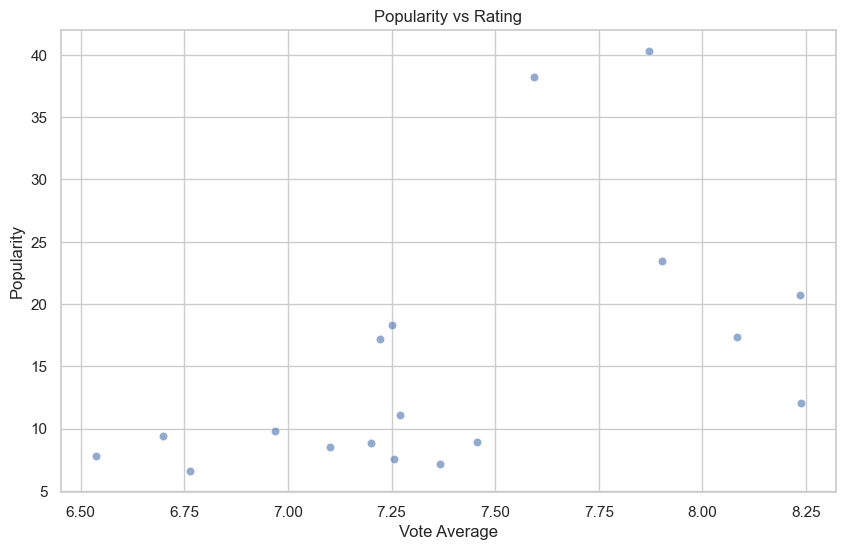

In [175]:
# popularity vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='vote_average', y='popularity', alpha=0.6)
plt.title('Popularity vs Rating')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()

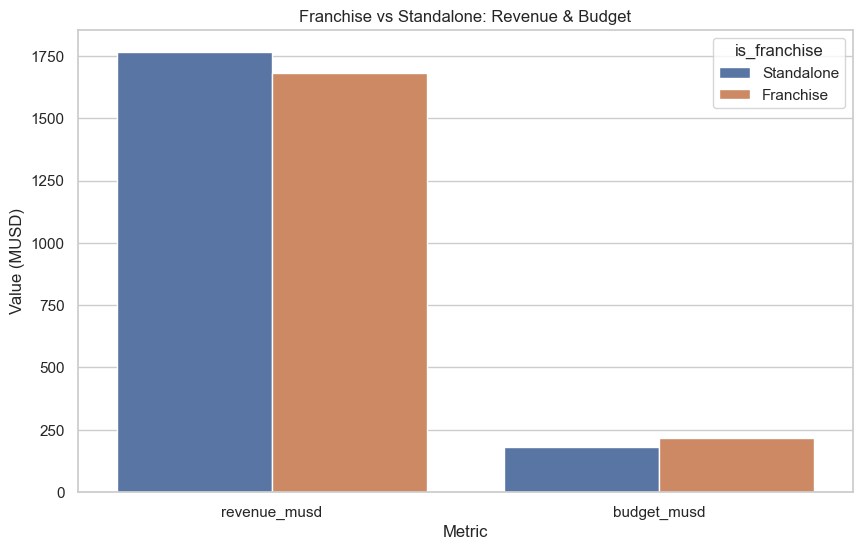

In [174]:
# franchise vs standalone bar chart
franchise_plot = df_clean.groupby('is_franchise').agg({
    'revenue_musd': 'mean',
    'budget_musd': 'mean'
}).reset_index()

franchise_plot['is_franchise'] = franchise_plot['is_franchise'].map({
    True: 'Franchise',
    False: 'Standalone'
})

franchise_melt = franchise_plot.melt(
    id_vars='is_franchise', 
    value_vars=['revenue_musd', 'budget_musd'], 
    var_name='Metric', 
    value_name='Value (MUSD)'
)

plt.figure(figsize=(10, 6))
sns.barplot(data=franchise_melt, x='Metric', y='Value (MUSD)', hue='is_franchise', hue_order=['Standalone', 'Franchise'])
plt.title('Franchise vs Standalone: Revenue & Budget')
plt.show()

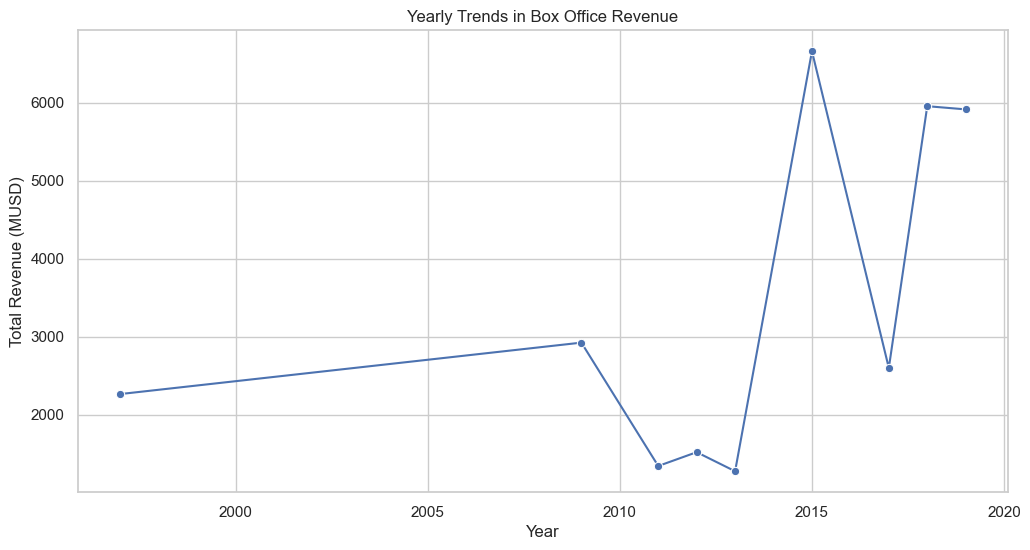

In [170]:
# yearly revenue trends
yearly_stats = df_clean.groupby('release_year')['revenue_musd'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x='release_year', y='revenue_musd', marker='o')
plt.title('Yearly Trends in Box Office Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue (MUSD)')
plt.show()

## Conclusion

In this project I fetched movie data from the TMDB API, cleaned it up and did some analysis. I looked at things like revenue, profit, ROI and ratings to find the best and worst movies. I also compared franchises to standalone movies and found the top directors by revenue.